# Hackathon Bitsxlamarato 2022

___ 

Team : 

- Ider Walid
- Mayol Marie
- Diez Eric
- Jacquot Christian
- Delorme Yannig

**Subject** :

The challenge concerns the development of a mobile phone application capable of capturing and processing biomedical signals from a portable device. This information is used to power AI/ML models for stroke risk assessment that reside in a cluster with on-demand inference capability. The expected result is the simulation of a realistic scenario in which stroke risk predictions are made based on data from sensors in the continuum between the edge and the cloud.

Technological point of view
As devices become smaller and more portable, the power of the cloud must be accompanied by strategies to increase performance and improve privacy at the edge. Several startups in the market are advancing distributed intelligence by designing IoT systems for healthcare. In particular, wearable devices and biometric sensors represent the new frontiers of distributed computing with the integration of AI and machine learning that provide real-time feedback enabling the current boom in the IT market. self-monitoring (smart watches and other devices, mobile software applications, etc.).


___

In [56]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from math import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import sklearn as sk
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler 
from sklearn.inspection import permutation_importance

### Generating Data

In [85]:
# Generate the data
data = pd.read_csv("test.csv").drop(columns=["Unnamed: 0"])
#data, data_test = train_test_split(data, test_size=0.2)
df=data
#data.drop(columns=["id"],inplace=True)
df

,x,y
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
...,...,...
6043,6043,-2.333333
6044,6044,-1.833333
6045,6045,-1.333333
6046,6046,-0.833333


In [86]:
data.describe()

,x,y
count,6048.000000,5892.000000
mean,3023.500000,-0.220468
std,1746.051546,17.154915
min,0.000000,-80.833333
25%,1511.750000,-4.833333
50%,3023.500000,-2.333333
75%,4535.250000,0.666667
max,6047.000000,158.666667


In [87]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ratio': round(100 * (dataframe[col_name].value_counts()) / len(dataframe), 2)}))

    if plot:
        sns.countplot(x=col_name, data=dataframe)
        plt.show()

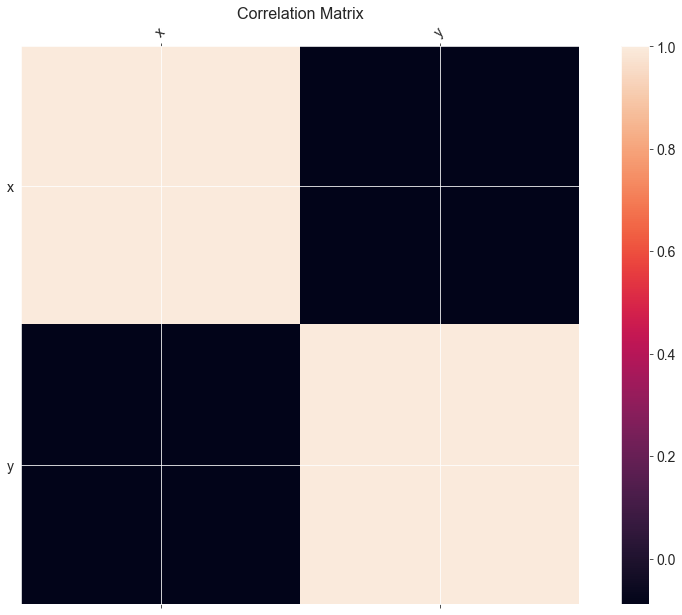

In [88]:
f = plt.figure(figsize=(15, 10))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [89]:
# Check Dataset:

def check_data(dataframe,head=5):
    print(20*"-" + "Information".center(20) + 20*"-")
    print(dataframe.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(dataframe.shape)
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-")
    print(dataframe.head())
    print("\n" + 20 * "-" + "The Last 5 Data".center(20) + 20 * "-")
    print(dataframe.tail())
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
    print(dataframe.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(dataframe.describe().T)
check_data(df)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6048 entries, 0 to 6047
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       6048 non-null   int64  
 1   y       5892 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 94.6 KB
None
--------------------     Data Shape     --------------------
(6048, 2)

--------------------  The First 5 Data  --------------------
   x   y
0  0 NaN
1  1 NaN
2  2 NaN
3  3 NaN
4  4 NaN

--------------------  The Last 5 Data   --------------------
         x         y
6043  6043 -2.333333
6044  6044 -1.833333
6045  6045 -1.333333
6046  6046 -0.833333
6047  6047       NaN

--------------------   Missing Values   --------------------
x      0
y    156
dtype: int64

----------------------------------------           Describe the Data            ----------------------------------------
    count         mean          std    

### Creating a model for the data

In [63]:
reg = LinearRegression()
clf = KNeighborsClassifier()
sc=StandardScaler()
le=LabelEncoder()

In [64]:
def encode_categorical_columns(df: pd.DataFrame) -> pd.DataFrame:
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
    return df

In [65]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
X=data.drop(columns=['stroke'])
y=data["stroke"]
X=encode_categorical_columns(X)

In [66]:
#Empty Data:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [17]:
clf.score(X_test,y_test)

0.9548148148148148

In [18]:
y_pred = clf.predict(X)
y_prob = clf.predict_proba(X)[:, 1]

In [19]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3891
           1       1.00      0.01      0.02       197

    accuracy                           0.95      4088
   macro avg       0.98      0.51      0.50      4088
weighted avg       0.95      0.95      0.93      4088



In [20]:
cv_results = cross_validate(clf, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [21]:
print("test_accuracy: ", cv_results['test_accuracy'].mean())
print("test_f1: ", cv_results['test_f1'].mean())
print("test_roc_auc: ", cv_results['test_roc_auc'].mean())

test_accuracy:  0.9520551962723662
test_f1:  0.019523809523809523
test_roc_auc:  0.53637505818352


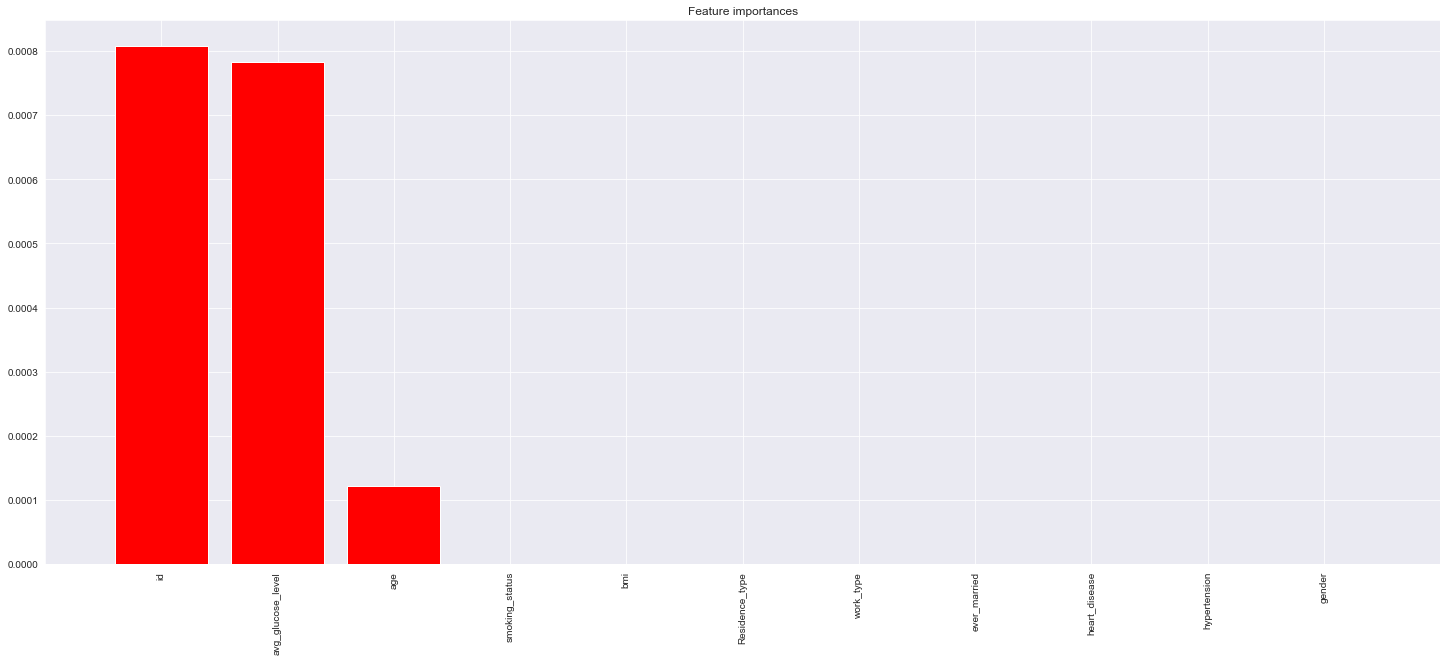

In [22]:
# Compute the permutation importances
result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=-1)

# Extract the importances from the result
importances = result['importances_mean']

# Sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Extract the names of the features
feature_names = X.columns[indices]

# Plot the feature importances
plt.figure(figsize=(25,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [23]:
clf.score(encode_categorical_columns(data_test.drop(columns=['stroke']).fillna(data_test['bmi'].median())),data_test["stroke"])

0.949119373776908

### Optimization of the hyperparameters

In [24]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [25]:
clf_params = {"n_neighbors": range(2, 50)}

In [26]:
new_clf = GridSearchCV(clf, clf_params, cv=5, n_jobs=-1, verbose=1).fit(X, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [27]:
new_clf.best_params_

{'n_neighbors': 5}

In [28]:
clf_final = clf.set_params(**new_clf.best_params_).fit(X, y)

In [29]:
cv_results = cross_validate(clf_final,
                            X,
                            y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

In [30]:
print("test_accuracy: ", cv_results['test_accuracy'].mean())
print("test_f1: ", cv_results['test_f1'].mean())
print("test_roc_auc: ", cv_results['test_roc_auc'].mean())

test_accuracy:  0.9520551962723662
test_f1:  0.019523809523809523
test_roc_auc:  0.53637505818352


In [31]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [70]:
data_x['bmi'] = data_x['bmi'].fillna(data_x['bmi'].median())
data_x = encode_categorical_columns(data_x)
pd.DataFrame(clf.predict(data_x)).describe()

,0
count,1022.000000
mean,0.002935
std,0.054126
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [41]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000
mean,36418.674413,43.237789,0.096380,0.053082,106.569770,28.907901,0.048190
std,21270.874616,22.590833,0.295147,0.224225,45.825654,7.766669,0.214193
min,67.000000,0.080000,0.000000,0.000000,55.120000,11.500000,0.000000
25%,17509.250000,25.000000,0.000000,0.000000,77.590000,23.800000,0.000000
50%,36817.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54729.750000,61.000000,0.000000,0.000000,114.320000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [75]:
pd.read_csv("prediction.csv")[pd.read_csv("prediction.csv")["0"]==1]

,Unnamed: 0,0
176,176,1
1716,1716,1
2220,2220,1
2556,2556,1
3095,3095,1


In [52]:
df.drop(columns=["stroke"]).to_csv("data_test.csv",sep=";",index=False)

In [ ]:
import tkinter as tk
from tkinter import Label
import random

# define list of thrombosis symptoms
symptoms = ['pain or swelling in the leg', 'shortness of breath', 'chest pain or pressure', 'headache', 'dizziness or fainting']

# define list of thrombosis prevention tips
prevention_tips = ['maintain a healthy weight', 'exercise regularly', "don't smoke", 'drink alcohol in moderation', 'maintain a healthy diet']

# define list of false answers for symptoms
false_symptoms = ['cough', 'runny nose', 'sore throat', 'fever', 'nausea']

# define list of false answers for prevention tips
false_prevention_tips = ['take vitamin supplements', 'drink lots of water', 'get plenty of sleep', 'wash your hands frequently', 'avoid contact with sick people']

# define function to present symptom and ask for user input
def present_symptom(symptom):
  global correct_answer
  symptom_label.config(text="Symptom: " + symptom)
  yes_button.config(state='normal')
  no_button.config(state='normal')
  if symptom in symptoms:
    correct_answer = 'yes'
  else:
    correct_answer = 'no'

def present_prevention_tip(prevention_tip):
  global correct_answer
  symptom_label.config(text="Prevention Tip: " + prevention_tip)
  yes_button.config(state='normal')
  no_button.config(state='normal')
  if prevention_tip in prevention_tips:
    correct_answer = 'yes'
  else:
    correct_answer = 'no'


def check_answer(user_answer):
  if user_answer == correct_answer:
    result_label.config(text='Correct!', fg='green')
  else:
    result_label.config(text='Incorrect.', fg='red')
  # disable yes and no buttons
  yes_button.config(state='disabled')
  no_button.config(state='disabled')
  # exit the loop if the user clicks 'No'
  while 1:
      if user_answer == 'no' or user_answer=="yes":
        break

# define main game loop
def play_game():
  global stop_game
  result_label.config(text='')  # reset result label text
  questions_asked = 0
  max_questions = 5  # modify this to control the number of questions asked
  while questions_asked < max_questions:
    # randomly choose between presenting a symptom or prevention tip
    if random.choice([True, False]):
      # present a random symptom and ask for user input
      present_symptom(random.choice(symptoms + false_symptoms))
    else:
      # present a random prevention tip and ask for user input
      present_prevention_tip(random.choice(prevention_tips))
    questions_asked += 1



# create main window
root = tk.Tk()
root.title('Thrombosis Awareness Game')

# create start game button
start_button = tk.Button(root, text='Start the game', command=play_game)
start_button.pack()

# create stop game button
stop_button = tk.Button(root, text='Stop the game', command=root.destroy)
stop_button.pack()

# create label to display symptom or prevention tip
symptom_label =Label(root, text='', font=('Arial', 20))
symptom_label.pack()

# create yes and no buttons
yes_button = tk.Button(root, text='Yes', command=lambda: (check_answer('yes'), stop_game), state='disabled')
yes_button.pack(side='left')
no_button = tk.Button(root, text='No', command=lambda: (check_answer('no'), stop_game), state='disabled')
no_button.pack(side='right')

# create label to display result
result_label = tk.Label(root, text='', font=('Arial', 20))
result_label.pack()

# start the main loop
root.mainloop()